# CNN for image classification

In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Visualizing the image data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[0]

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
single_image.shape

(28, 28)

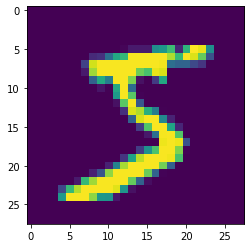

In [9]:
plt.imshow(single_image)

# PreProcessing Data

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# One hot encoding

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
y_example = to_categorical(y_train)

In [15]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test = to_categorical(y_test,num_classes = 10)

In [19]:
y_cat_train = to_categorical(y_train,10)

In [20]:
single_image.max()

255

In [21]:
single_image.min()

0

In [22]:
x_train = x_train/255
x_test = x_test/255

In [23]:
scaled_single = x_train[0]

In [24]:
scaled_single.max()

1.0

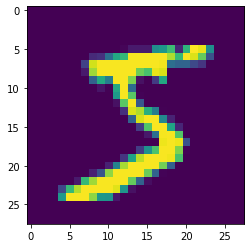

In [25]:
plt.imshow(scaled_single)

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
x_test.shape

(10000, 28, 28)

In [28]:
x_train = x_train.reshape(60000,28,28,1)

In [29]:
x_train.shape

(60000, 28, 28, 1)

In [30]:
x_test = x_test.reshape(10000,28,28,1)

In [31]:
x_test.shape

(10000, 28, 28, 1)

# Training the model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape = (28,28,1),activation = 'relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128,activation = 'relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10,activation = 'softmax'))

# https://keras.io/metrics/
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 1)

In [37]:
model.fit(x_train,y_cat_train,epochs = 10,validation_data = (x_test,y_cat_test),callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1361 - accuracy: 0.9586 - val_loss: 0.0499 - val_accuracy: 0.9840
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0395 - val_accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0363 - val_accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0391 - val_accuracy: 0.9880


# Evaluate the Model

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
losses = pd.DataFrame(model.history.history)

In [40]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.136134,0.958567,0.049852,0.9840
1,0.045482,0.985767,0.039463,0.9872
2,0.029474,0.990450,0.036316,0.9889
3,0.020420,0.993717,0.039073,0.9880


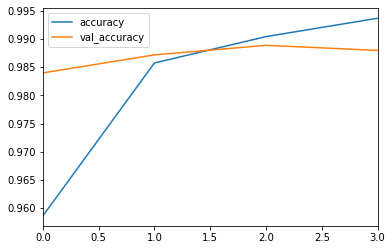

In [41]:
losses[['accuracy','val_accuracy']].plot()

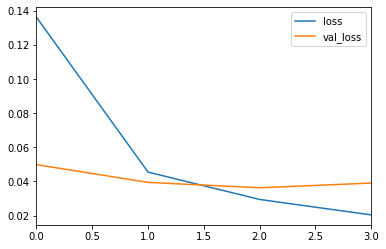

In [42]:
losses[['loss','val_loss']].plot()

In [43]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0391 - accuracy: 0.9880


[0.03907329589128494, 0.9879999756813049]

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [47]:
predictions1 = np.argmax(model.predict(x_test), axis=-1)

In [48]:
y_cat_test.shape

(10000, 10)

In [49]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [50]:
predictions[0]

7

In [51]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [53]:
confusion_matrix(y_test,predictions)

array([[ 965,    0,    2,    1,    0,    3,    3,    0,    0,    6],
       [   0, 1129,    0,    1,    1,    1,    2,    1,    0,    0],
       [   2,    3, 1007,    4,    1,    0,    1,   10,    4,    0],
       [   0,    0,    0, 1003,    0,    6,    0,    0,    1,    0],
       [   0,    0,    0,    0,  973,    0,    1,    0,    0,    8],
       [   0,    0,    1,    3,    0,  887,    1,    0,    0,    0],
       [   2,    1,    0,    0,    2,    5,  948,    0,    0,    0],
       [   0,    2,    4,    4,    0,    0,    0, 1013,    1,    4],
       [   3,    0,    1,    0,    0,    3,    0,    2,  960,    5],
       [   0,    0,    0,    2,    2,    5,    0,    4,    1,  995]],
      dtype=int64)

In [54]:
import seaborn as sns

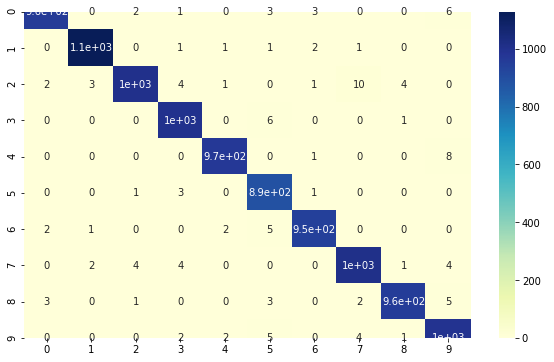

In [55]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot = True,cmap = 'YlGnBu')

# Predicting a new image

In [64]:
my_number = x_test[3]

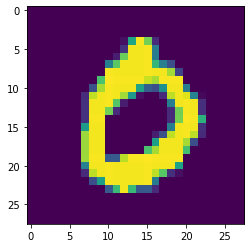

In [65]:
plt.imshow(my_number.reshape(28,28))

In [66]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

array([0], dtype=int64)